<a href="https://colab.research.google.com/github/kridtapon/Net-Sentiment-Proxy/blob/main/Net_Sentiment_Proxy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install vectorbt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.6/527.6 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.7/295.7 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 50.2 MB/s eta 0:00:00


In [ ]:
pip install --upgrade yfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.8/109.8 kB 4.3 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.54
    Uninstalling yfinance-0.2.54:
      Successfully uninstalled yfinance-0.2.54


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import vectorbt as vbt

# Function to calculate MACD and Signal Line
def calculate_macd(df, fast_period=12, slow_period=26, signal_period=9):
    macd = df['Close'].ewm(span=fast_period, adjust=False).mean() - df['Close'].ewm(span=slow_period, adjust=False).mean()
    signal_line = macd.ewm(span=signal_period, adjust=False).mean()
    return macd, signal_line

# Calculate RSI
def calculate_rsi(df, period=14):
    delta = df['Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Define the stock symbol and time period
symbol = 'META'
start_date = '2019-01-01'
end_date = '2025-01-01'

# Download the data
df = yf.download(symbol, start=start_date, end=end_date)
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

# Calculate MACD and Signal Line
df['MACD'], df['MACD_Signal'] = calculate_macd(df)

# Calculate RSI
df['RSI'] = calculate_rsi(df)

# Calculate 50-period Simple Moving Average (SMA)
df['SMA50'] = df['Close'].rolling(window=50).mean()

# Normalize the indicators
df['Normalized_RSI'] = df['RSI'] / 100  # RSI ranges from 0 to 100, so divide by 100
df['Normalized_MACD'] = (df['MACD'] - df['MACD'].min()) / (df['MACD'].max() - df['MACD'].min())  # Normalize MACD to 0-1 range
df['Normalized_SMA'] = (df['Close'] - df['SMA50']) / df['SMA50']  # Normalizing close price relative to SMA

# Combine indicators to form a composite proxy (simple sum in this case, with weights)
df['Composite_Proxy'] = 0.4 * df['Normalized_RSI'] + 0.3 * df['Normalized_MACD'] + 0.3 * df['Normalized_SMA']

# Filter data for the test period (2020-2025)
df = df[(df.index.year >= 2020) & (df.index.year <= 2025)]

# Define Entry and Exit signals based on Composite Proxy
df['Entry'] = df['Composite_Proxy'] > 0.5  # Buy when composite proxy > 0.5
df['Exit'] = df['Composite_Proxy'] < 0.2  # Sell when composite proxy < 0.2

# Backtest using vectorbt
portfolio = vbt.Portfolio.from_signals(
    close=df['Close'],
    entries=df['Entry'],
    exits=df['Exit'],
    init_cash=100_000,
    fees=0.001,
    freq='D'
)

# Display performance metrics
print(portfolio.stats())

# Plot equity curve
portfolio.plot().show()


[*********************100%***********************]  1 of 1 completed


Start                         2020-01-02 00:00:00
End                           2024-12-31 00:00:00
Period                         1258 days 00:00:00
Start Value                              100000.0
End Value                           414887.835087
Total Return [%]                       314.887835
Benchmark Return [%]                   180.172878
Max Gross Exposure [%]                      100.0
Total Fees Paid                       2334.785774
Max Drawdown [%]                        29.191062
Max Drawdown Duration           349 days 00:00:00
Total Trades                                    6
Total Closed Trades                             5
Total Open Trades                               1
Open Trade PnL                       41913.498821
Win Rate [%]                                 60.0
Best Trade [%]                         231.809525
Worst Trade [%]                         -13.08927
Avg Winning Trade [%]                   91.161955
Avg Losing Trade [%]                   -11.921423


[*********************100%***********************]  1 of 1 completed


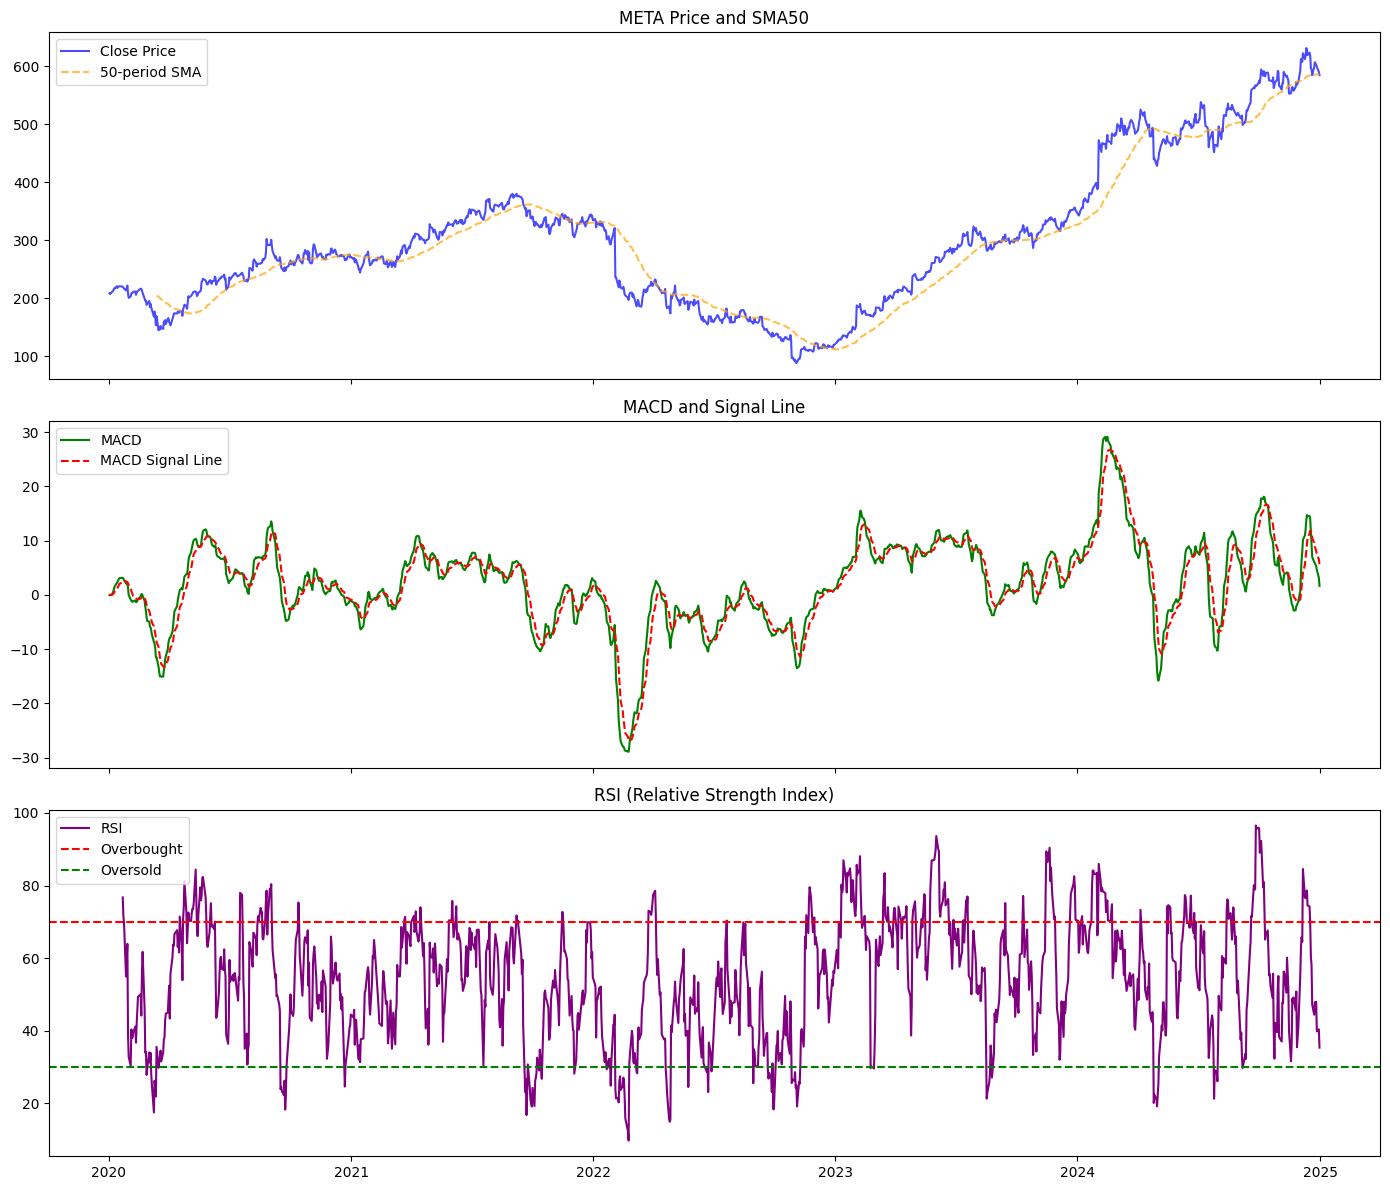

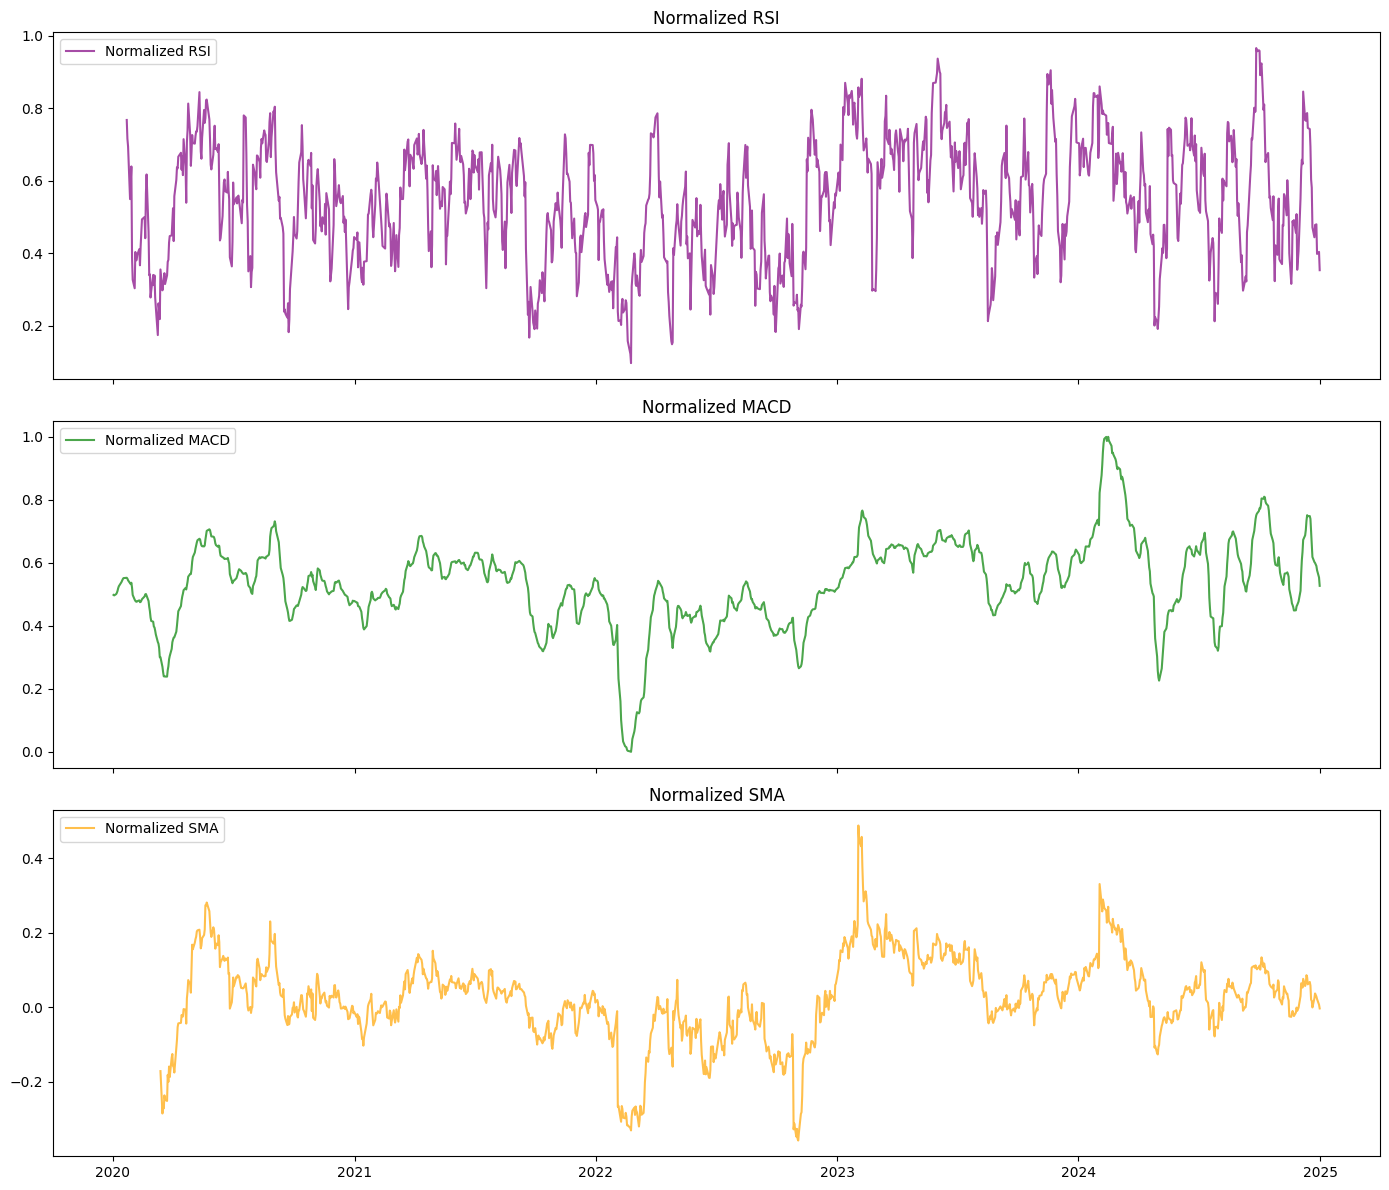

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Function to calculate MACD and Signal Line
def calculate_macd(df, fast_period=12, slow_period=26, signal_period=9):
    macd = df['Close'].ewm(span=fast_period, adjust=False).mean() - df['Close'].ewm(span=slow_period, adjust=False).mean()
    signal_line = macd.ewm(span=signal_period, adjust=False).mean()
    return macd, signal_line

# Calculate RSI
def calculate_rsi(df, period=14):
    delta = df['Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Define the stock symbol and time period
symbol = 'META'
start_date = '2020-01-01'
end_date = '2025-01-01'

# Download the data
df = yf.download(symbol, start=start_date, end=end_date)
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

# Calculate MACD and Signal Line
df['MACD'], df['MACD_Signal'] = calculate_macd(df)

# Calculate RSI
df['RSI'] = calculate_rsi(df)

# Calculate 50-period Simple Moving Average (SMA)
df['SMA50'] = df['Close'].rolling(window=50).mean()

# Normalize the indicators
df['Normalized_RSI'] = df['RSI'] / 100  # RSI ranges from 0 to 100, so divide by 100
df['Normalized_MACD'] = (df['MACD'] - df['MACD'].min()) / (df['MACD'].max() - df['MACD'].min())  # Normalize MACD to 0-1 range
df['Normalized_SMA'] = (df['Close'] - df['SMA50']) / df['SMA50']  # Normalizing close price relative to SMA

# Plotting the Normal Indicators (Price, MACD, RSI, and SMA)
fig, axes = plt.subplots(3, 1, figsize=(14, 12), sharex=True)

# Plot Close Price and SMA
axes[0].plot(df['Close'], label='Close Price', color='blue', alpha=0.7)
axes[0].plot(df['SMA50'], label='50-period SMA', color='orange', linestyle='--', alpha=0.7)
axes[0].set_title(f'{symbol} Price and SMA50')
axes[0].legend(loc='upper left')

# Plot MACD and Signal Line
axes[1].plot(df['MACD'], label='MACD', color='green')
axes[1].plot(df['MACD_Signal'], label='MACD Signal Line', color='red', linestyle='--')
axes[1].set_title('MACD and Signal Line')
axes[1].legend(loc='upper left')

# Plot RSI
axes[2].plot(df['RSI'], label='RSI', color='purple')
axes[2].axhline(70, color='red', linestyle='--', label='Overbought')
axes[2].axhline(30, color='green', linestyle='--', label='Oversold')
axes[2].set_title('RSI (Relative Strength Index)')
axes[2].legend(loc='upper left')

plt.tight_layout()
plt.show()

# Plotting the Normalized Indicators (Normalized RSI, MACD, and SMA)
fig, axes = plt.subplots(3, 1, figsize=(14, 12), sharex=True)

# Plot Normalized RSI
axes[0].plot(df['Normalized_RSI'], label='Normalized RSI', color='purple', alpha=0.7)
axes[0].set_title('Normalized RSI')
axes[0].legend(loc='upper left')

# Plot Normalized MACD
axes[1].plot(df['Normalized_MACD'], label='Normalized MACD', color='green', alpha=0.7)
axes[1].set_title('Normalized MACD')
axes[1].legend(loc='upper left')

# Plot Normalized SMA
axes[2].plot(df['Normalized_SMA'], label='Normalized SMA', color='orange', alpha=0.7)
axes[2].set_title('Normalized SMA')
axes[2].legend(loc='upper left')

plt.tight_layout()
plt.show()
